# Ejercicios Validación Cruzada-1151674

Importar librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Leer el archivo con las columnas respectivas

In [15]:
dataset = pd.read_csv("vehiculos_procesado.csv", usecols=["consumo", "co2", "cilindros","desplazamiento"])
dataset.head()

,desplazamiento,cilindros,consumo,co2
0,2.5,4.0,17,522.764706
1,4.2,6.0,13,683.615385
2,2.5,4.0,16,555.437500
3,4.2,6.0,13,683.615385
4,3.8,6.0,16,555.437500


In [14]:
dataset.shape

(35539, 4)

In [ ]:
Analisis exploratorio de datos (EDA)

In [16]:
#descripcion del dataframe
dataset.describe()

,desplazamiento,cilindros,consumo,co2
count,35539.000000,35539.000000,35539.000000,35539.000000
mean,3.308585,5.727426,19.863277,470.607342
std,1.318233,1.705600,4.383492,104.425820
min,1.000000,2.000000,10.000000,169.000000
25%,2.200000,4.000000,17.000000,396.000000
50%,3.000000,6.000000,19.000000,465.000000
75%,4.300000,6.000000,23.000000,525.000000
max,8.400000,12.000000,33.000000,782.000000


In [17]:
#Verificar si existen valores NaN
dataset.isnull().sum()

desplazamiento    0
cilindros         0
consumo           0
co2               0
dtype: int64

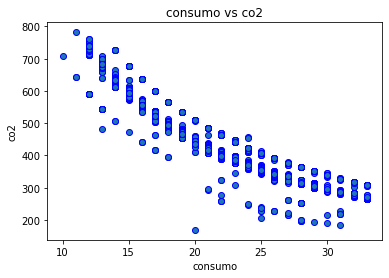

In [28]:
#Histograma de la variable consumo y co2.
fig, ax = plt.subplots()
ax.scatter(dataset['consumo'], dataset['co2'] ,edgecolors=(0, 0, 1))
plt.title("consumo vs co2")
ax.set_xlabel('consumo')
ax.set_ylabel('co2')
plt.show()

Capturar datos a evaluar

In [3]:
x_m = dataset.iloc[:, :-1]
y_m = dataset.iloc[:, 3:4]

Correlación entre variables

In [4]:
df = pd.DataFrame(dataset)
df.corr()

,desplazamiento,cilindros,consumo,co2
desplazamiento,1.000000,0.904993,-0.761534,0.799911
cilindros,0.904993,1.000000,-0.717313,0.750958
consumo,-0.761534,-0.717313,1.000000,-0.958927
co2,0.799911,0.750958,-0.958927,1.000000


Mapa de calor de la correlación entre variables

<AxesSubplot:>

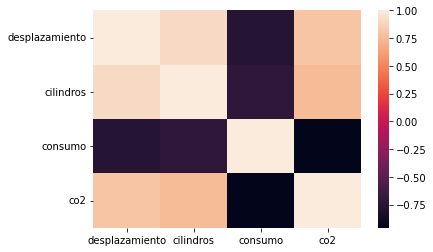

In [5]:
sns.heatmap(df.corr())

Dividir el dataset en dos conjuntos uno de entrenamiento y otro de prueba

In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate
x_train, x_test, y_train, y_test = train_test_split(x_m, y_m, test_size=0.2)

Encuentrar el modelo con los datos de entrenamiento y realizar la predicción con los datos de prueba

In [7]:
#Definir el algoritmo utilizado
lrm = linear_model.LinearRegression()

In [8]:
#Entrenar el modelo
lrm.fit(x_train, y_train)

LinearRegression()

In [9]:
#Realizar predicción
y_prediccion = lrm.predict(x_test)

Realizar una validación cruzada con cv=10, muestrar los score, utilizando como métrica a R2

In [10]:
from sklearn.metrics import r2_score
scores = cross_val_score(lrm, x_m, y_m, cv=10, scoring="r2")
scores

array([0.92348975, 0.92100359, 0.9166913 , 0.92329927, 0.93469489,
       0.92607562, 0.92043394, 0.93057615, 0.92440553, 0.90480354])

Promedio de scores

In [11]:
scores.mean()

0.9225473584236823

Encontrar el R2

In [12]:
r2_score(y_test, y_prediccion)

0.9306752625784361

Dibujar una dispersión de los datos co2 actual vs co2 predicción

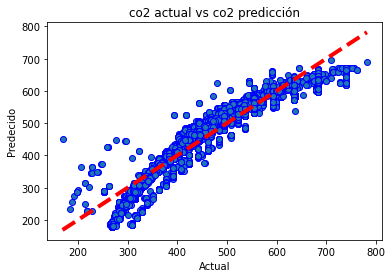

In [13]:
predicted = cross_val_predict(lrm, x_m, y_m, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_m, predicted, edgecolors=(0, 0, 1))
ax.plot([y_m.min(), y_m.max()], [y_m.min(), y_m.max()], 'r--', linewidth=4)
plt.title("co2 actual vs co2 predicción")
ax.set_xlabel('Actual')
ax.set_ylabel('Predecido')
plt.show()